<a href="https://colab.research.google.com/github/vaneesa-writes/micro_project/blob/main/segmnet_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Case_1-01.tif to Case_1-01.tif


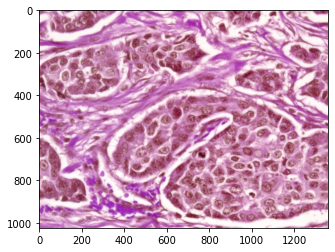

In [5]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# read original image
image = cv2.imread("/content/Case_1-01.tif")
plt.imshow(image)

In [7]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# read original image
image = cv2.imread("/content/claheNorm.png")
# cv2.imshow(img)

# convert to gray scale image
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2.imwrite('gray1.png', gray)

# apply median filter for smoothning
blurM = cv2.medianBlur(gray, 5)
cv2.imwrite('blurM1.png', blurM)

# apply gaussian filter for smoothning
blurG = cv2.GaussianBlur(gray, (9, 9), 0)
cv2.imwrite('blurG1.png', blurG)

# histogram equalization
histoNorm = cv2.equalizeHist(gray)
cv2.imwrite('histoNorm1.png', histoNorm)

# create a CLAHE object for
# Contrast Limited Adaptive Histogram Equalization (CLAHE)
clahe = cv2.createCLAHE(clipLimit = 2.0, tileGridSize=(8, 8))
claheNorm = clahe.apply(gray)
cv2.imwrite('claheNorm1.png', claheNorm)


# contrast stretching
# Function to map each intensity level to output intensity level.
def pixelVal(pix, r1, s1, r2, s2):
	if (0 <= pix and pix <= r1):
		return (s1 / r1) * pix
	elif (r1 < pix and pix <= r2):
		return ((s2 - s1) / (r2 - r1)) * (pix - r1) + s1
	else:
		return ((255 - s2) / (255 - r2)) * (pix - r2) + s2

	# Define parameters.


r1 = 70
s1 = 0
r2 = 200
s2 = 255

# Vectorize the function to apply it to each value in the Numpy array.
pixelVal_vec = np.vectorize(pixelVal)

# Apply contrast stretching.
contrast_stretched = pixelVal_vec(gray, r1, s1, r2, s2)
contrast_stretched_blurM = pixelVal_vec(blurM, r1, s1, r2, s2)

cv2.imwrite('contrast_stretch1.png', contrast_stretched)
cv2.imwrite('contrast_stretch_blurM1.png',
			contrast_stretched_blurM)

# edge detection using canny edge detector
edge = cv2.Canny(gray, 100, 200)
cv2.imwrite('edge1.png', edge)

edgeG = cv2.Canny(blurG, 100, 200)
cv2.imwrite('edgeG1.png', edgeG)

edgeM = cv2.Canny(blurM, 100, 200)
cv2.imwrite('edgeM1.png', edgeM)


True

In [38]:
img=cv2.imread('/content/claheNorm.png')

In [39]:
img.shape

(1024, 1360, 3)

In [40]:
import numpy as np


new_img=np.zeros([1024,1360,3],dtype=int)

cv2.imwrite('new_img.png', new_img)


True

In [43]:
new_img

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]])

In [66]:
for i in range(1024):
  for j in range(1360):
    for k in range(3):

      if(img[i][j][k]>=60):
        new_img[i][j][k]=255



In [23]:
IMG_HEIGHT=1024
IMG_WIDTH=1360

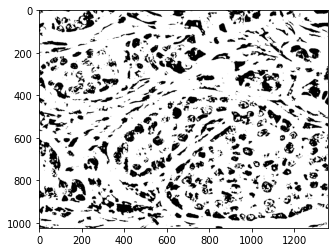

In [67]:
plt.imshow(new_img)

In [34]:
mask = np.maximum(mask, img>128)

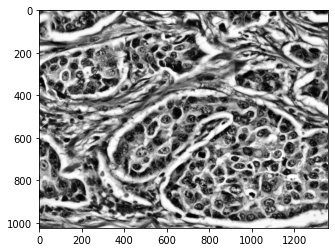

In [35]:
plt.imshow(mask)

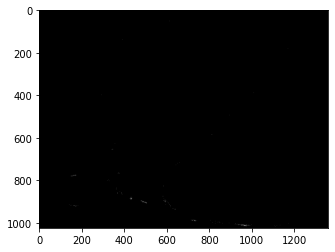

In [37]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('/content/Case_1-01.tif')   # you can read in images with opencv
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

hsv_color1 = np.asarray([0, 0, 255])   # white!
hsv_color2 = np.asarray([30, 255, 255])   # yellow! note the order

mask = cv2.inRange(img_hsv, hsv_color1, hsv_color2)

plt.imshow(mask, cmap='gray')   # this colormap will display in black / white
plt.show()

In [36]:
mask==img

array([[[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True],
        ...,
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True]],

       [[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True],
        ...,
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True]],

       [[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True],
        ...,
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True]],

       ...,

       [[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True],
        ...,
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True]],

       [[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True],
        ...,
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,